In [ ]:
#task3

In [1]:
import pandas as pd

df = pd.read_csv('Housing.csv')
display(df.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
print("Missing values before handling:")
print(df.isnull().sum())

binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

display(df.head())

Missing values before handling:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Missing values after handling:
price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (436, 13)
Shape of X_test: (109, 13)
Shape of y_train: (436,)
Shape of y_test: (109,)


Simple Linear Regression (Area vs. Price):
Mean Absolute Error (MAE): 1474748.13
Mean Squared Error (MSE): 3675286604768.19
R-squared (R²): 0.27


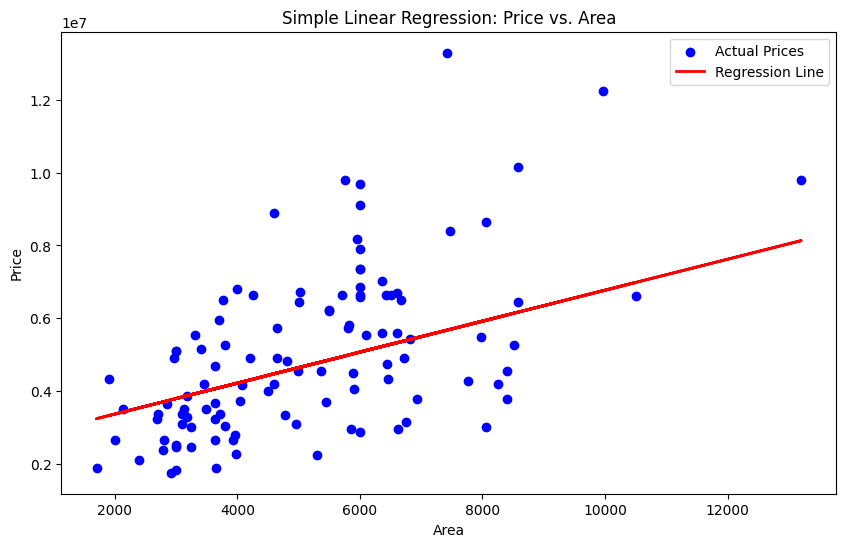

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

X_train_area = X_train['area'].values.reshape(-1, 1)
X_test_area = X_test['area'].values.reshape(-1, 1)

model = LinearRegression()

model.fit(X_train_area, y_train)

y_pred_area = model.predict(X_test_area)

mae = mean_absolute_error(y_test, y_pred_area)
mse = mean_squared_error(y_test, y_pred_area)
r2 = r2_score(y_test, y_pred_area)

print(f"Simple Linear Regression (Area vs. Price):")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test_area, y_test, color='blue', label='Actual Prices')
plt.plot(X_test_area, y_pred_area, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Price vs. Area")
plt.legend()
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

multiple_model = LinearRegression()

multiple_model.fit(X_train, y_train)

y_pred_multiple = multiple_model.predict(X_test)

mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("Multiple Linear Regression:")
print(f"Mean Absolute Error (MAE): {mae_multiple:.2f}")
print(f"Mean Squared Error (MSE): {mse_multiple:.2f}")
print(f"R-squared (R²): {r2_multiple:.2f}")

print("\nMultiple Linear Regression Intercept:")
print(multiple_model.intercept_)

print("\nMultiple Linear Regression Coefficients:")
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': multiple_model.coef_})
display(coefficients)

Multiple Linear Regression:
Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.66
R-squared (R²): 0.65

Multiple Linear Regression Intercept:
260032.35760741122

Multiple Linear Regression Coefficients:


,Feature,Coefficient
0,area,2.359688e+02
1,bedrooms,7.677870e+04
2,bathrooms,1.094445e+06
3,stories,4.074766e+05
4,mainroad,3.679199e+05
5,guestroom,2.316100e+05
6,basement,3.902512e+05
7,hotwaterheating,6.846499e+05
8,airconditioning,7.914267e+05
9,parking,2.248419e+05


## Summary:

### Data Analysis Key Findings

*   The dataset initially had no missing values.
*   Binary categorical variables were successfully converted to numerical (0 or 1).
*   The 'furnishingstatus' column was one-hot encoded, creating new columns for 'semi-furnished' and 'unfurnished'.
*   The data was split into training (80%) and testing (20%) sets.
*   Simple linear regression using 'area' to predict 'price' resulted in an R² of 0.27, MAE of \$1,474,748.13, and MSE of \$3,675,286,604,768.19 on the test data. This indicates that 'area' alone explains about 27% of the price variance.
*   Multiple linear regression using all features resulted in an R² of 0.65, MAE of \$970,043.40, and MSE of \$1,754,318,687,330.66 on the test data. This model explains about 65% of the price variance.
*   The multiple regression model's coefficients indicate the estimated change in price for a one-unit increase in a feature, holding others constant. For instance, having a bathroom is associated with a significant increase in price (coefficient \~ \$1.09 million), while an unfurnished status is associated with a decrease in price (coefficient \~ -\$413,000) compared to the baseline furnishing status.


